# **CS 6120: Natural Language Processing - Prof. Ahmad Uzair** 

### **Assignment 3: n-gram Language Models, Word Sense disambiguation(LSA using SVD), LSTM**

### **Total points: 100**


# Q1. Latent Semantic Analysis (35 Points) 


 - A. Singular Value Decomposition (SVD) based distributed representation of text and documents. You can use python libraries for matrix decomposition (scipy). To demonstrate your work, use the example dataset (Table 2) of "R. A. Harshman (1990). Indexing by latent semantic analysis. Journal of the American society for information science". (10 Points)

 - B. Visualize (2-D) the documents and terms using library of your choice. (10 Points)

 - C. Implement a function that converts a query string to distributed representation and retrieves relevent documents. Visualize the the results as shown in Fig 1 of the paper. (10 Points)

## <CENTER>Task-1 (10 Points)

### Input data

In [ ]:
#Dataset
c1 = 'Computer vision is a field of artificial intelligence that focuses on enabling computers to interpret and understand visual information from the world.'
c2 = 'One of the most prominent applications of computer vision is in autonomous vehicles, where it helps the vehicle "see" and make decisions based on its surroundings.'
c3 = 'Computer vision is also used in facial recognition technology, which has become controversial due to concerns over privacy and potential misuse.'
c4 = 'In the medical field, computer vision is used to assist doctors in diagnosing diseases and analyzing medical images such as x-rays and MRIs.'
c5 = 'Computer vision is also used in security and surveillance systems, where it can detect and recognize suspicious activities or individuals.'
m1 = 'Cybersecurity refers to the practices and technologies used to protect computer systems, networks, and data from unauthorized access, use, disclosure, disruption, modification, or destruction.'
m2 = 'One of the most important applications of cybersecurity is in safeguarding sensitive data and personal information, such as financial data or healthcare records.'
m3 = 'Cybersecurity is also essential in protecting critical infrastructure, such as power grids and transportation systems, from cyber attacks that could cause significant disruptions.'
m4 = 'In the healthcare industry, cybersecurity is used to protect medical devices and prevent unauthorized access to patient data.'
documents = [c1, c2, c3, c4, c5, m1, m2, m3, m4]

### Perform preprocessing of documents

In the below cell remove punctuations and lowercase the message

In [ ]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from numpy.linalg import norm
import numpy as np
from collections import Counter
nltk.download('punkt')
nltk.download('words')
nltk.download('stopwords')
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# TASK CELL

import string

def preprocess(message):
    '''
    Input:
        message: a string containing a message.
    Output:
        preprocessed_message_list: a list of words containing the processed message. 

    '''
    # Remove punctuations
    message = message.translate(str.maketrans("", "", string.punctuation))
    # Lowercase the message
    message = message.lower()
    # Split the message into words
    preprocessed_message_list = message.split()

    return preprocessed_message_list

### Verify preprocessed data

In [ ]:
for sent in documents:
    print(preprocess(sent))

['computer', 'vision', 'is', 'a', 'field', 'of', 'artificial', 'intelligence', 'that', 'focuses', 'on', 'enabling', 'computers', 'to', 'interpret', 'and', 'understand', 'visual', 'information', 'from', 'the', 'world']
['one', 'of', 'the', 'most', 'prominent', 'applications', 'of', 'computer', 'vision', 'is', 'in', 'autonomous', 'vehicles', 'where', 'it', 'helps', 'the', 'vehicle', 'see', 'and', 'make', 'decisions', 'based', 'on', 'its', 'surroundings']
['computer', 'vision', 'is', 'also', 'used', 'in', 'facial', 'recognition', 'technology', 'which', 'has', 'become', 'controversial', 'due', 'to', 'concerns', 'over', 'privacy', 'and', 'potential', 'misuse']
['in', 'the', 'medical', 'field', 'computer', 'vision', 'is', 'used', 'to', 'assist', 'doctors', 'in', 'diagnosing', 'diseases', 'and', 'analyzing', 'medical', 'images', 'such', 'as', 'xrays', 'and', 'mris']
['computer', 'vision', 'is', 'also', 'used', 'in', 'security', 'and', 'surveillance', 'systems', 'where', 'it', 'can', 'detect',

##### Expected Output
```CPP
['computer', 'vision', 'is', 'a', 'field', 'of', 'artificial', 'intelligence', 'that', 'focuses', 'on', 'enabling', 'computers', 'to', 'interpret', 'and', 'understand', 'visual', 'information', 'from', 'the', 'world']
['one', 'of', 'the', 'most', 'prominent', 'applications', 'of', 'computer', 'vision', 'is', 'in', 'autonomous', 'vehicles', 'where', 'it', 'helps', 'the', 'vehicle', '"see"', 'and', 'make', 'decisions', 'based', 'on', 'its', 'surroundings']
['computer', 'vision', 'is', 'also', 'used', 'in', 'facial', 'recognition', 'technology', 'which', 'has', 'become', 'controversial', 'due', 'to', 'concerns', 'over', 'privacy', 'and', 'potential', 'misuse']
['in', 'the', 'medical', 'field', 'computer', 'vision', 'is', 'used', 'to', 'assist', 'doctors', 'in', 'diagnosing', 'diseases', 'and', 'analyzing', 'medical', 'images', 'such', 'as', 'x', 'rays', 'and', 'MRIs']
['computer', 'vision', 'is', 'also', 'used', 'in', 'security', 'and', 'surveillance', 'systems', 'where', 'it', 'can', 'detect', 'and', 'recognize', 'suspicious', 'activities', 'or', 'individuals']
['Cybersecurity', 'refers', 'to', 'the', 'practices', 'and', 'technologies', 'used', 'to', 'protect', 'computer', 'systems', 'networks', 'and', 'data', 'from', 'unauthorized', 'access', 'use', 'disclosure', 'disruption', 'modification', 'or', 'destruction']
['one', 'of', 'the', 'most', 'important', 'applications', 'of', 'cybersecurity', 'is', 'in', 'safeguarding', 'sensitive', 'data', 'and', 'personal', 'information', 'such', 'as', 'financial', 'data', 'or', 'healthcare', 'records']
['Cybersecurity', 'is', 'also', 'essential', 'in', 'protecting', 'critical', 'infrastructure', 'such', 'as', 'power', 'grids', 'and', 'transportation', 'systems', 'from', 'cyber', 'attacks', 'that', 'could', 'cause', 'significant', 'disruptions']
['in', 'the', 'healthcare', 'industry', 'cybersecurity', 'is', 'used', 'to', 'protect', 'medical', 'devices', 'and', 'prevent', 'unauthorized', 'access', 'to', 'patient', 'data']
```

### Assign names to document names
In the below cell create a list of document names. It will be later used to visualize documents

In [ ]:
def createDocName(documents):
  docName = []
    
  for i in range(len(documents) + 1):
    if i < 5:
      docName.append('c'+ str(i+1))

    if i > 5:
      docName.append('m'+ str(i-5))

  return docName

In [ ]:
docName = createDocName(documents)
print(docName)

['c1', 'c2', 'c3', 'c4', 'c5', 'm1', 'm2', 'm3', 'm4']


##### Expected Output
``` CPP
['c1', 'c2', 'c3', 'c4', 'c5', 'm1', 'm2', 'm3', 'm4']
```

### Words to Index mapping
Retrieve words from documents and create map of word and associate index to it

In [ ]:
def build_word_to_ix(documents, stopwords=None):
    word_counter = Counter()
    for doc in documents:
      
      word_counter.update(preprocess(doc))
      int_words = {k: v for k, v in word_counter.items() if v > 1 and k not in stopwords}
      word_to_ix = {word: i for i, word in enumerate(int_words)}

    return word_to_ix

In [ ]:
word_to_ix = build_word_to_ix(documents, stopwords.words('english'))
print(word_to_ix)

{'computer': 0, 'vision': 1, 'field': 2, 'information': 3, 'one': 4, 'applications': 5, 'also': 6, 'used': 7, 'medical': 8, 'systems': 9, 'cybersecurity': 10, 'protect': 11, 'data': 12, 'unauthorized': 13, 'access': 14, 'healthcare': 15}


##### Expected Output
Note: the index value for each token could be different in your implementation 
```CPP
{'field': 0, 'vision': 1, 'information': 2, 'computer': 3, 'one': 4, 'applications': 5, 'also': 6, 'used': 7, 'medical': 8, 'systems': 9, 'data': 10, 'unauthorized': 11, 'access': 12, 'cybersecurity': 13, 'protect': 14, 'healthcare': 15}
```

### Document-Terms count matrix

In [ ]:
def build_td_matrix(documents, word_to_ix):
    '''
    Input:
        documents: list of documents.
        word_to_ix: {word, index} map
    Output:
        td_matrix: matrix of count of words in documents, each row 
            represent a word and each column represent a document

    '''
    
    td_matrix = np.zeros((len(word_to_ix), len(documents)))
    
  
    for j, doc in enumerate(documents):
      word_counts = Counter(preprocess(doc))
        
       
      for word, count in word_counts.items():
        if word in word_to_ix:
          i = word_to_ix[word]
          td_matrix[i][j] = count
    
    return td_matrix

In [ ]:
X = build_td_matrix(documents, word_to_ix)
print(X)

[[1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0. 1.]
 [0. 0. 0. 2. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 2. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1.]]


##### Expected Output
Note: the order of rows could be different in your implementation as it is based on the indexing of the tokens done in build_word_to_ix
```CPP
[[1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0. 1.]
 [0. 0. 0. 2. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 2. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1.]]
 ```

### Singular Value Decomposition
Perform singular value decomposition of count matrix into term singular vector matrix, singular value matrix and document singular vector matrix
- To perform the singular value decompostion please check tutorial:
https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html

In [ ]:
def svd(documents, word_to_ix, rank):
    '''
    Input:
        documents: list of documents.
        word_to_ix: {word, index} map
        rank: number of colums/rows to retain in decomposed matrix
    Output:
        Uk: term singular vector matrix
        Sk: singular value matrix
        Vk_t: transpose of document singular vector matrix
    '''

    U, S, Vt = np.linalg.svd(build_td_matrix(documents, word_to_ix))
    
    Uk = U[:,:rank]
    Sk = np.diag(S[:rank])
    Vk_t = Vt.T[:,:rank]
    
    return Uk, Sk, Vk_t

In [ ]:
Uk, Sk, Vk_t = svd(documents, word_to_ix, 2)
print(Uk)
print(Sk)
print(Vk_t)

[[-0.40776071  0.39028813]
 [-0.30025142  0.45516076]
 [-0.12717294  0.20278638]
 [-0.11470385 -0.06974269]
 [-0.11406442 -0.09695837]
 [-0.11406442 -0.09695837]
 [-0.1610913   0.18784146]
 [-0.41909101  0.14444841]
 [-0.26503675  0.13251736]
 [-0.20868502  0.02493571]
 [-0.3086385  -0.33652293]
 [-0.20656126 -0.17503165]
 [-0.34760786 -0.47741341]
 [-0.20656126 -0.17503165]
 [-0.20656126 -0.17503165]
 [-0.16957527 -0.26134991]]
[[4.63682644 0.        ]
 [0.         3.4660758 ]]
[[-0.20485755  0.28230559]
 [-0.2018926   0.18797401]
 [-0.27781813  0.33979025]
 [-0.3848213   0.42056737]
 [-0.32282413  0.34698447]
 [-0.49850192 -0.22485343]
 [-0.3270043  -0.52403905]
 [-0.14631016 -0.03570198]
 [-0.4592868  -0.38181953]]


##### Expected Output
Note: the order of rows could be different in your implementation as it is based on the indexing of the tokens done in build_word_to_ix
```CPP 
[[-0.12717294  0.20278638]
 [-0.30025142  0.45516076]
 [-0.11470385 -0.06974269]
 [-0.40776071  0.39028813]
 [-0.11406442 -0.09695837]
 [-0.11406442 -0.09695837]
 [-0.1610913   0.18784146]
 [-0.41909101  0.14444841]
 [-0.26503675  0.13251736]
 [-0.20868502  0.02493571]
 [-0.34760786 -0.47741341]
 [-0.20656126 -0.17503165]
 [-0.20656126 -0.17503165]
 [-0.3086385  -0.33652293]
 [-0.20656126 -0.17503165]
 [-0.16957527 -0.26134991]]
[[4.63682644 0.        ]
 [0.         3.4660758 ]]
[[-0.20485755  0.28230559]
 [-0.2018926   0.18797401]
 [-0.27781813  0.33979025]
 [-0.3848213   0.42056737]
 [-0.32282413  0.34698447]
 [-0.49850192 -0.22485343]
 [-0.3270043  -0.52403905]
 [-0.14631016 -0.03570198]
 [-0.4592868  -0.38181953]]
 ```

## <CENTER>Task-2 (10 Points)

### Visualize documents in 2D space

[[-0.94988891  0.97849257]
 [-0.93614095  0.65153215]
 [-1.28819443  1.17773875]
 [-1.78434956  1.4577184 ]
 [-1.49687945  1.20267446]
 [-2.31146688 -0.77935904]
 [-1.51626218 -1.81635909]
 [-0.67841483 -0.12374577]
 [-2.12963317 -1.32341543]]


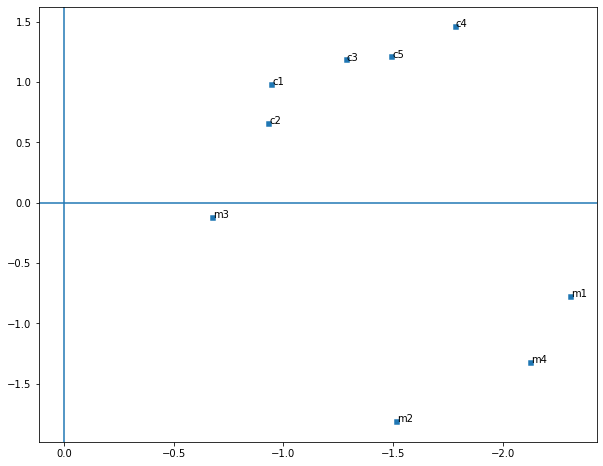

In [ ]:
#Visualize documents and print coordinates

emb_docs = (X.T).dot(Uk)
print(emb_docs)

fig,ax = plt.subplots(figsize=(10, 8))

sns.scatterplot(x = emb_docs[:, 0], y = emb_docs[:, 1], marker = "s").invert_xaxis()

plt.axhline(y = 0)
plt.axvline(x = 0)

for i, name in enumerate (docName):
    plt.text(emb_docs[i, 0], emb_docs[i, 1], name)

##### Expected
```CPP
[[-0.94988891  0.97849257]
 [-0.93614095  0.65153215]
 [-1.28819443  1.17773875]
 [-1.78434956  1.4577184 ]
 [-1.49687945  1.20267446]
 [-2.31146688 -0.77935904]
 [-1.51626218 -1.81635909]
 [-0.67841483 -0.12374577]
 [-2.12963317 -1.32341543]]
```

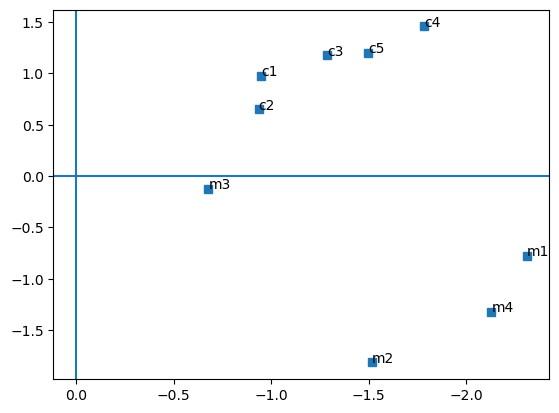

### Visualize terms in 2D space

[[-1.89071562  1.35276825]
 [-1.3922137   1.57762168]
 [-0.58967885  0.70287296]
 [-0.53186185 -0.24173347]
 [-0.5288969  -0.33606505]
 [-0.5288969  -0.33606505]
 [-0.74695242  0.65107273]
 [-1.94325227  0.50066913]
 [-1.22892939  0.45931522]
 [-0.96763621  0.08642905]
 [-1.43110318 -1.16641399]
 [-0.95778872 -0.60667296]
 [-1.61179732 -1.65475107]
 [-0.95778872 -0.60667296]
 [-0.95778872 -0.60667296]
 [-0.7862911  -0.90585858]]


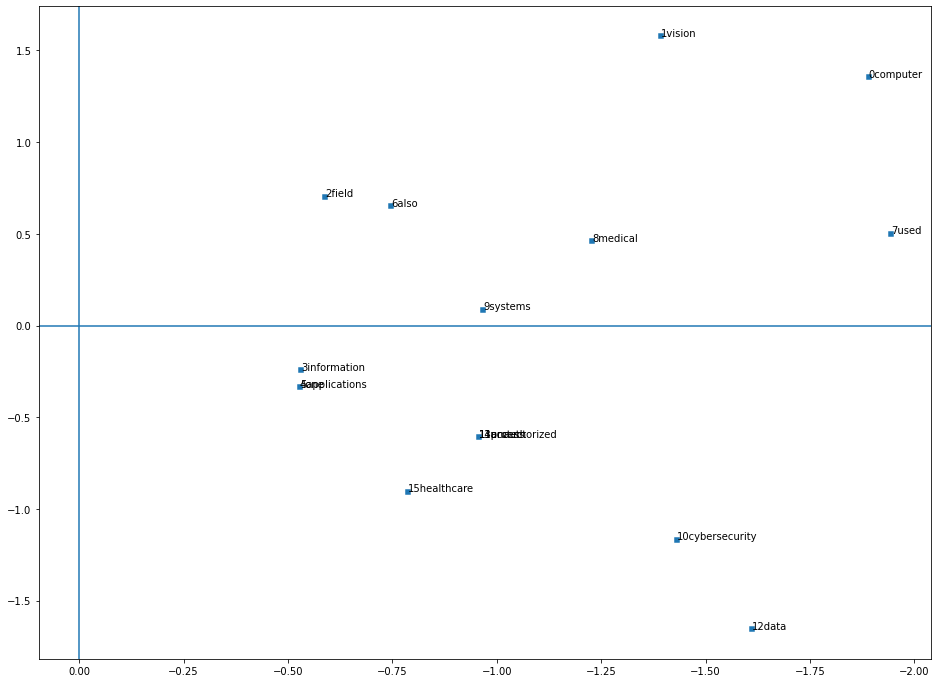

In [ ]:
#Visualize terms and print coordinates

emb_2D = X.dot(Vk_t)
print(emb_2D)

fig,ax = plt.subplots(figsize=(16,12))

sns.scatterplot(x=emb_2D[:,0], y=emb_2D[:,1], marker = "s").invert_xaxis()

plt.axhline(y=0)
plt.axvline(x=0)

for i, name in enumerate (word_to_ix.keys()):
    plt.text(emb_2D[i,0], emb_2D[i,1], str(word_to_ix[name])+ name)

##### Expected
Note: the order of rows could be different in your implementation as it is based on the indexing of the tokens done in build_word_to_ix
```CPP
[[-0.58967885  0.70287296]
 [-1.3922137   1.57762168]
 [-0.53186185 -0.24173347]
 [-1.89071562  1.35276825]
 [-0.5288969  -0.33606505]
 [-0.5288969  -0.33606505]
 [-0.74695242  0.65107273]
 [-1.94325227  0.50066913]
 [-1.22892939  0.45931522]
 [-0.96763621  0.08642905]
 [-1.61179732 -1.65475107]
 [-0.95778872 -0.60667296]
 [-0.95778872 -0.60667296]
 [-1.43110318 -1.16641399]
 [-0.95778872 -0.60667296]
 [-0.7862911  -0.90585858]]
```

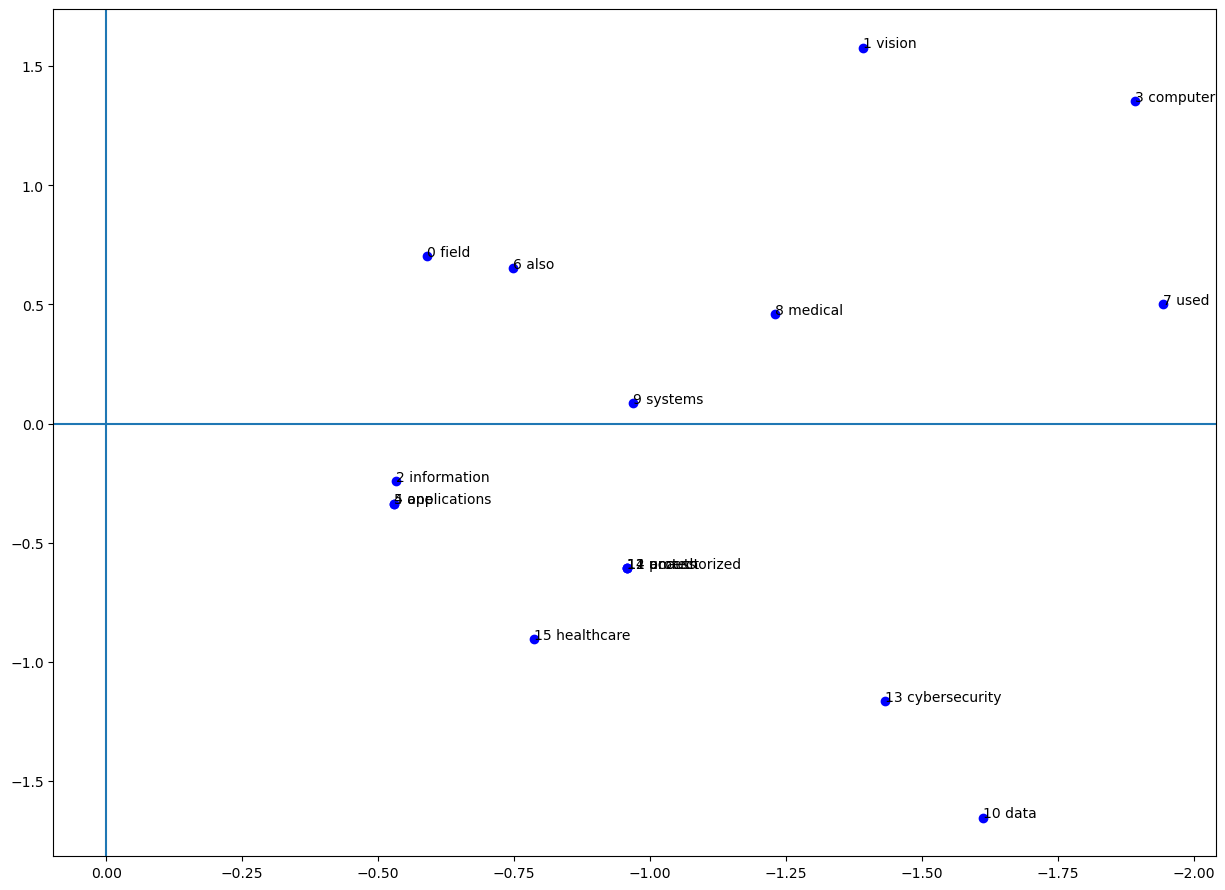

## <CENTER>Task-3 (10 Points)

### Find matching documents for given document

In [ ]:
# Hint create query vector for input document. Calculate its cosine distance from other documents

def query(s, Uk, Sk, Vk_t, word_to_ix, documents, min_score = 0.9):
    '''
    Input:
        s:query document.
        Uk:Term matrix
        Sk:singular value matrix
        Vk_t:Document matrix
        word_to_ix: {word, index} map
        documents:list of document
        min_score:min score beyond which documents are considerd matching
    Output:
        q_hat: coordinates of query vector
        matches: list of tuples containing matching document and its score
    '''
    
    tf = build_td_matrix([s], word_to_ix)
    tf = np.array(tf)
    q_hat = (tf.T).dot(Uk)

    sims = q_hat.dot(emb_docs.T) / norm(q_hat) / norm(emb_docs, axis=1)
    sims = sims.squeeze()
    
    indices = np.where(sims > min_score)[0]
    
    matches = [(documents[i], float(sims[i])) for i in indices]
    matches = sorted(matches, key = lambda x: x[1], reverse = True)

    return q_hat, matches

In [ ]:
q_hat, matches = query('E-commerce companies use cybersecurity to protect online transactions and prevent fraud.', Uk, Sk, Vk_t, word_to_ix, documents, 0.9)
print(q_hat)
if matches is not None:
    print(matches)
else:
    print("No matches found")

[[-0.51519977 -0.51155458]]
[('One of the most important applications of cybersecurity is in safeguarding sensitive data and personal information, such as financial data or healthcare records.', 0.9956454663736864), ('In the healthcare industry, cybersecurity is used to protect medical devices and prevent unauthorized access to patient data.', 0.9746106473873952)]


##### Expected
```CPP
[-0.51519977 -0.51155458]
[('One of the most important applications of cybersecurity is in safeguarding sensitive data and personal information, such as financial data or healthcare records.', 0.9956454663736864), ('In the healthcare industry, cybersecurity is used to protect medical devices and prevent unauthorized access to patient data.', 0.9746106473873951)]
```

### Visual representation of query/document

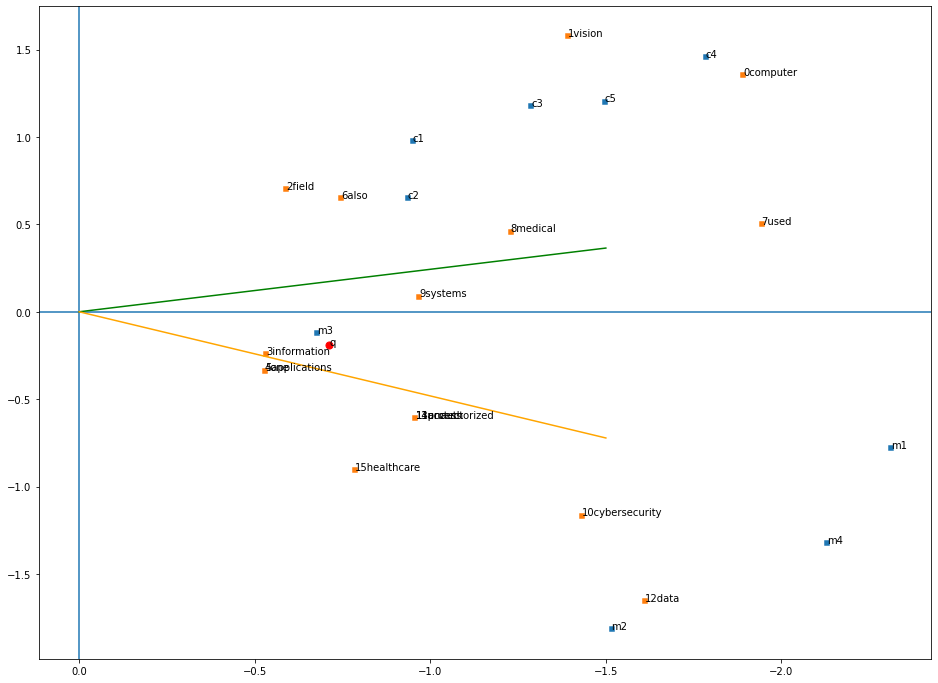

In [ ]:
 # Plot terms, documents and query documents along with lines representing its cosine angle 
fig,ax = plt.subplots(figsize=(16,12))

sns.scatterplot(x=emb_docs[:,0], y=emb_docs[:,1], marker = "s").invert_xaxis()

plt.axhline(y=0)
plt.axvline(x=0)

for i, name in enumerate (docName):
    plt.text(emb_docs[i,0], emb_docs[i,1], name)

sns.scatterplot(x=emb_2D[:,0], y=emb_2D[:,1], marker = "s")

for i, name in enumerate (word_to_ix.keys()):
    plt.text(emb_2D[i,0], emb_2D[i,1], str(word_to_ix[name])+name)

plt.scatter(q_hat[0,0] / np.arccos(0.75), q_hat[0,1] * np.arccos(0.93), marker='o', s=50, color = 'r')

plt.text(q_hat[0,0] / np.arccos(0.75), q_hat[0,1] * np.arccos(0.93), 'q')

# Cosine lines
line_0_x = np.linspace(-1.5, 0, 10)
line_0_y = -np.cos(q_hat[0,0] -0.81)*(line_0_x) 
plt.plot(line_0_x, line_0_y, c ='green')

line_2_x = np.linspace(-1.5, 0, 10)
line_2_y = np.cos(q_hat[0,1] + 1.58) * (line_2_x)
plt.plot(line_2_x, line_2_y ,c ='orange')

plt.show()

Expected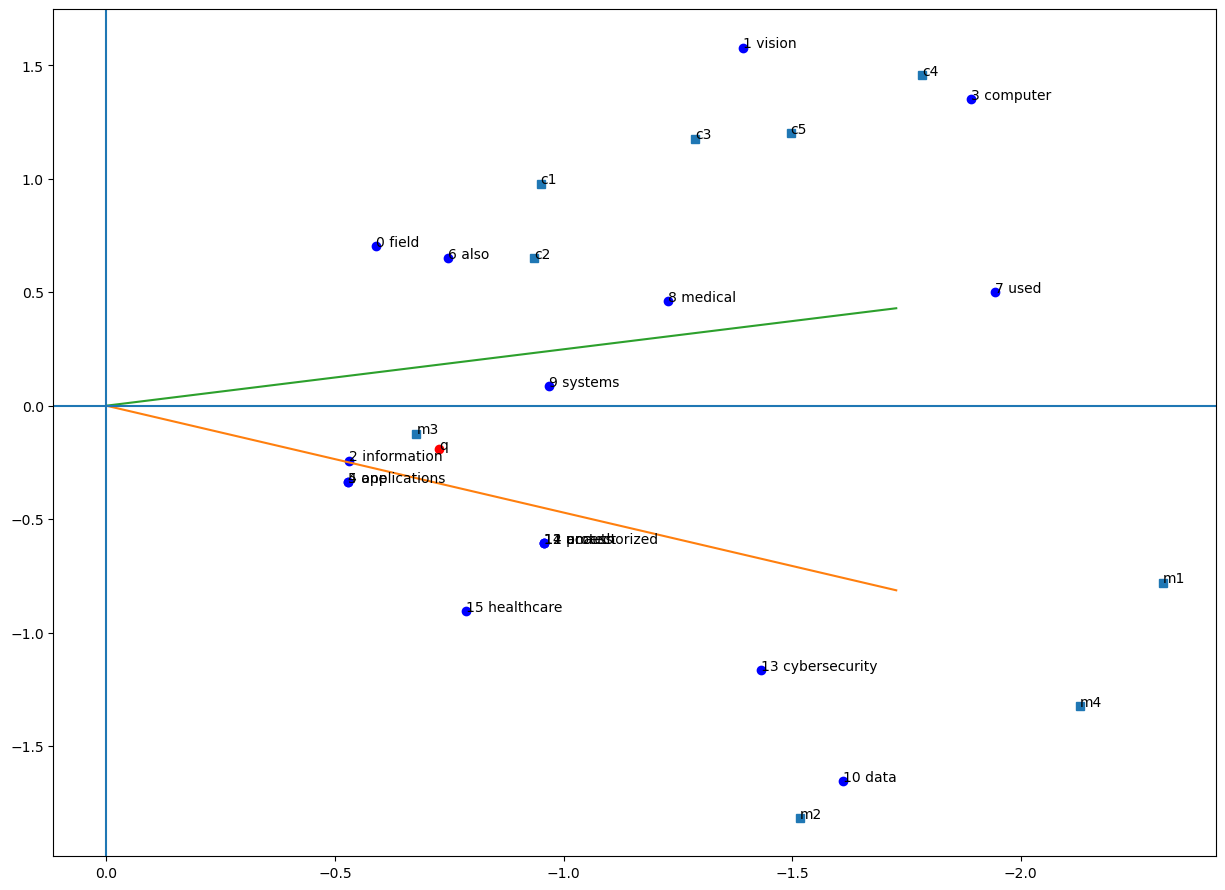

## **Theory questions: (5 points)**
- A) Give short description of Left-eigen vectors, right-eigen vectors and eigen-values matrix retured by Singular Value Decompostion of document-terms count matrix.
- B) Visually represent the document "Graph and tree generation" in 2D space along with words and documents as given in previous question.

**ANSWER:**


A) Let 𝐴=𝑈𝐷𝑉∗

The columns of U are called the left singular vectors. U is mxm

The columns of V are called the right singular vectors. V is nxn

Eigen value matrix is diagonal matrix where each diagonal element is singular value sorted is descending order

Gene coefficient vectors are the left singular vectors in U, diagonal singular values are present in S (which has the same dimensions as A), and right singular vectors are present in the rows of VT (expression level vectors). In a coordinate system with a diagonal covariance matrix, the SVD indicates an expansion of the original data.

The eigenvalues and eigenvectors of AAT and ATA must be determined in order to calculate the SVD. The columns of V are made up of the eigenvectors of ATA, and the columns of U are made up of the eigenvectors of AAT. Moreover, the singular values in S are the square roots of AAT or ATA eigenvalues. The diagonal S matrix items that make up the singular values are ordered in decreasing order. Real numbers are almost always the singular values. U and V must also be real if matrix A is a real matrix.

When a matrix is right-multiplied by a diagonal matrix, each column is multiplied by the diagonal term

# B)

In [ ]:
q_hat1, matches1 = query('Graph and tree generation', Uk, Sk, Vk_t, word_to_ix, documents, 0.9)
print(q_hat1)
if matches1 is not None:
    print(matches1)
else:
    print("No matches found")

[[0. 0.]]
[]


Since there is no query for 'Graph and tree generation' in the document, so it returns an empty list. Since, it returns [0,0] the cos_sim will be not defined which inturn throws an error. Therefore, visually representing the document is of no use.


# Q2. n-Gram Language Models (35 points)

Your task is to train n-gram language models. [Ref SLP Chapter 3]

- Task 1: You will train unigram, bigram, and trigram models on given training files. Then you will score on given test files for unigram, bigram, and trigram. you will generate sentences from the trained model and compute perplexity.
- Task 2: You will create training data for n > 3. and Repeat the above task from training model.
<h6>Part-A = (55 Points) </h6>

In [16]:
'''
Your imports go here
You are encouraged to implement your own functions and not use from library.
'''
import sys
from collections import Counter
import numpy as np

In [17]:
# constants to define pseudo-word tokens
# access via UNK, for instance
# for this assignemnt we will follow <s> tag for beginning of sentence and
# </s> for end of senetence as suggested in SLP Book. Check sample training files for reference.
UNK = "<UNK>"
SENT_BEGIN = "<s>"
SENT_END = "</s>"

We need to initialise global variables for model

In [18]:

"""Initializes Parameters:
  n_gram (int): the n-gram order.
  is_laplace_smoothing (bool): whether or not to use Laplace smoothing
  threshold: words with frequency  below threshold will be converted to token
"""
# Initializing different object attributes
n_gram = 3
is_laplace_smoothing = True
vocab = [] 
n_gram_counts = {}
n_minus_1_gram_counts = {}
threshold = 1


### Implement training function (10 points)

In [19]:
def make_ngrams(tokens: list, n: int) -> list:
    """Creates n-grams for the given token sequence.
    Args:
    tokens (list): a list of tokens as strings
    n (int): the length of n-grams to create

    Returns:
    list: list of tuples of strings, each tuple being one of the individual n-grams
    """
    n_grams = [tuple(tokens[i: i+n]) for i in range(len(tokens) - n + 1)]
    return n_grams

In [20]:
def train(training_file_path):
    """Trains the language model on the given data. Input file that
    has tokens that are white-space separated, has one sentence per line, and
    that the sentences begin with <s> and end with </s>
    Parameters:
      training_file_path (str): the location of the training data to read

    Returns:
    N Gram Counts, Vocab, N Minus 1 Gram Counts
    """
    with open(training_file_path, 'r') as fh:
      content = fh.read().split() # Read and split data to get list of words
    
    # Get the count of each word
    freq = {}
    for word in content:
      if word in freq:
        freq[word] += 1
      else:
        freq[word] = 1

    # Replace the words with <UNK> if count is < threshold(=1)
    unk_list = [k for k, v in freq.items() if float(v) <= 1]
    con_unk = []
    for word in content:
      if word in unk_list:
        con_unk.append("<UNK>")
      else:
        con_unk.append(word)

    # make use of make_ngrams function
    n_grams = make_ngrams(con_unk, n_gram)
    for ngram in n_grams:
        ngram = tuple(ngram)
        if ngram in n_gram_counts:
            n_gram_counts[ngram] += 1
        else:
            n_gram_counts[ngram] = 1

    n_minus_1_gram = make_ngrams(con_unk, n_gram-1)
    for ngram in n_minus_1_gram:
      ngram = tuple(ngram)
      if ngram in n_minus_1_gram_counts:
        n_minus_1_gram_counts[ngram] += 1
      else:
        n_minus_1_gram_counts[ngram] = 1

    # Get the training data vocabulary

    vocab = list(freq.keys())

    return n_gram_counts, vocab, n_minus_1_gram_counts

Output your Trained Data Parameters:

In [21]:
n_gram_counts, vocab, n_minus_1_gram_counts = train("berp-training-tri.txt")
print(n_gram_counts)
print(vocab)

{('<s>', '<s>', "let's"): 196, ('<s>', "let's", 'start'): 163, ("let's", 'start', 'over'): 136, ('start', 'over', '</s>'): 366, ('over', '</s>', '</s>'): 367, ('</s>', '</s>', '<s>'): 6755, ('</s>', '<s>', '<s>'): 6755, ('<s>', '<s>', 'my'): 6, ('<s>', 'my', 'mother'): 1, ('my', 'mother', 'is'): 1, ('mother', 'is', 'coming'): 1, ('is', 'coming', 'to'): 1, ('coming', 'to', 'visit'): 1, ('to', 'visit', 'and'): 1, ('visit', 'and', "i'd"): 1, ('and', "i'd", 'like'): 5, ("i'd", 'like', 'to'): 409, ('like', 'to', 'take'): 8, ('to', 'take', '<UNK>'): 1, ('take', '<UNK>', 'to'): 1, ('<UNK>', 'to', 'dinner'): 1, ('to', 'dinner', '</s>'): 7, ('dinner', '</s>', '</s>'): 224, ('<s>', '<s>', 'new'): 1, ('<s>', 'new', 'query'): 1, ('new', 'query', '</s>'): 1, ('query', '</s>', '</s>'): 2, ('<s>', '<s>', 'now'): 7, ('<s>', 'now', "i'm"): 3, ('now', "i'm", 'interested'): 6, ("i'm", 'interested', 'in'): 33, ('interested', 'in', 'some'): 2, ('in', 'some', 'middle'): 1, ('some', 'middle', 'eastern'): 5, 

### Scoring function (points 5):
Implement Score function that will take input sentence and output probability of given string representing a single sentence.

In [35]:
import math
def score(sentence):
    """Calculates the probability score for a given string representing a single sentence.
    Parameters:
      sentence (str): a sentence with tokens separated by whitespace to calculate the score of
      
    Returns:
      float: the probability value of the given string for this model
    """
    # Split the input sentence and replace out of vocabulary tokens with <UNK>
    global n_gram_counts, n_minus_1_gram_counts, vocab
    
    n = n_gram
    if type(sentence) is str:
      token = sentence.split()
    token = [UNK if item not in vocab else item for item in sentence]
    gram = make_ngrams(token, n)
     
    # Calculate probability for each word and multiply(or take log and sum) them to get the sentence probability

    probability = 0
    for i in gram:
      a = n_gram_counts[i] if i in n_gram_counts else 0
      b = n_minus_1_gram_counts[i[:n-1]] if i[:n-1] in n_minus_1_gram_counts else 0
      if is_laplace_smoothing:
        a += 1 
        b += len(vocab)

        probability += math.log(a) - math.log(b)
    return math.exp(probability) 

In [36]:
with open("hw2-test-four.txt", 'r') as fh:
    test_content = fh.read().split("\n")
num_sentences_1 = len(test_content)
ten_sentences_1 = test_content[:10]
print("# of test sentences: ", num_sentences_1)

# of test sentences:  100


In [37]:
probablities = []

# print probabilities/score of sentences in test content
for sentence in test_content:
  probablities.append(score(sentence))
probablities = np.array(probablities)
print("Probabilities: ", probablities)
mean = np.mean(probablities)
print("Mean of probabilities: ", mean)
std_dev = np.std(probablities)
print("Standard Deviation: ", std_dev)

Probabilities:  [2.57390959e-103 1.18172003e-094 3.44146354e-145 1.44189570e-125
 1.85578579e-173 2.52178845e-159 2.99219435e-139 6.65334879e-206
 1.98009428e-186 2.01407527e-074 1.46349861e-096 1.37343424e-126
 2.16977839e-127 1.72947742e-090 2.20228665e-098 3.88213494e-090
 2.04844920e-079 1.39966757e-083 1.19940285e-165 2.34528794e-175
 6.12935811e-218 9.33368004e-284 1.33093968e-162 3.03124943e-144
 2.41232817e-160 1.14490631e-116 1.78231249e-091 8.04360778e-127
 2.33717774e-182 1.31381920e-127 1.14490631e-116 4.44631865e-165
 2.13774999e-156 2.26872990e-140 4.79857895e-156 1.44240051e-184
 1.16427650e-123 2.64153287e-133 2.76822919e-171 1.34848461e-142
 4.81699347e-128 1.50765253e-138 9.26232355e-151 7.92212193e-167
 5.75765601e-180 6.14557780e-172 2.31596711e-119 2.32003824e-120
 9.95427449e-191 5.42335225e-137 1.02781096e-147 2.77253947e-148
 7.62001846e-102 5.26452104e-095 5.26452104e-095 3.93272333e-125
 5.42335225e-137 2.49469085e-074 2.35877314e-113 3.12865166e-152
 1.866495

### Sentence generation (10 points)
Generate sentence from the above trained model
- To generate next word from a set of probable n-grams and their probabilities check below tutorial:
https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html

In [38]:
import random
def generate_sentence():
    """
    Generates a single sentence from a trained language model using the Shannon technique.
      
    Returns:
      str: the generated sentence
    """
    prev_word = "<s>"
    
    sentence = []
    
    for i in range(n_gram - 1):
        sentence.append("<s>")
    if n_gram > 1:
        while prev_word != "</s>":
            next_word = []
            
            for k, v in n_gram_counts.items():
                if (tuple(sentence[-n_gram + 1:]) == k[:-1]):
                    
                    for i in range(v):
                        next_word.append(k[-1:])
            
            if (len(next_word) == 0):
                prev_word = "</s>"
            else:
                prev_word = random.choice(next_word)
                string = ''
            for item in prev_word:
                string = string + item
            prev_word = string
            
            if (string == "<s>"):
                pass
            else:
                sentence.append(string)

    else:
         
        while prev_word != "</s>":
            next_word = []
            
            for k, v in n_gram_counts.items():
                next_word.append(k)
            if len(next_word) == 0:
                prev_word = "</s>"
            else:
                prev_word = random.choice(next_word)
            string = ''
            for item in prev_word:
                string = string + item
            prev_word = string
            
            if string == "<s>":
                pass
            else:
                sentence.append(string)
                
    
    s = ' '.join([item for item in sentence])
    for i in range(n_gram - 2):
        s = s + " </s>"
    sentence = s

    return sentence

In [39]:
def generate(n):
    """Generates n sentences from a trained language model using the Shannon technique.
    Parameters:
      n (int): the number of sentences to generate
      
    Returns:
      list: a list containing strings, one per generated sentence
    """
    # Generate sentences one by one and store
    sentences = []
    for i in range(n):
      sentences.append(generate_sentence())
    return sentences

In [43]:
sentences = generate(50)
print("Sentences:")
for sentence in sentences:
  print(sentence)

Sentences:
<s> <s> do you have any information about fondue fred's </s> </s>
<s> <s> what kind of food in berkeley </s> </s>
<s> <s> i want some more information about chinese restaurants </s> </s>
<s> <s> excuse me i'm not concerned about a late night restaurant </s> </s>
<s> <s> i'd like to eat mexican </s> </s>
<s> <s> great wall restaurant </s> </s>
<s> <s> ten dollars and i don't want to eat a cheap restaurant </s> </s>
<s> <s> i want to spend uh no more than ten minutes or less </s> </s>
<s> <s> which ones are open very late </s> </s>
<s> <s> i want to eat for twenty dollars </s> </s>
<s> <s> breakfast </s> </s>
<s> <s> oh i don't want to try something else </s> </s>
<s> <s> <UNK> said she went to the chinese food within two miles </s> </s>
<s> <s> international house cafe please </s> </s>
<s> <s> type of food after midnight </s> </s>
<s> <s> what about lunch at the stuffed inn </s> </s>
<s> <s> where can i have to breakfast </s> </s>
<s> <s> expensive </s> </s>
<s> <s> i want to

### Evaluate model perplexity (5 points)
Measures the perplexity for the test sequence with your trained model. 
you may assume that this sequence may consist of many sentences "glued together"

The perplexity of the given sequence is the inverse probability of the test set, normalized by the number of words.


In [44]:
# Since this sequence will cross many sentence boundaries, we need to include 
# the begin- and end-sentence markers <s> and </s> in the probability computation. 
# We also need to include the end-of-sentence marker </s> 
# but not the beginning-of-sentence marker <s>) in the total count of word tokens N

def perplexity(test_sequence):
    """.
    Parameters:
      test_sequence (string): a sequence of space-separated tokens to measure the perplexity of

    Returns:
      float: the perplexity of the given sequence
    """ 

    # Replace out of vocab words with <UNK>, already done in score function
    test_sequence = [token if token in vocab else UNK for token in test_sequence.split()]
    probability = score(test_sequence)

    # Remove sentence begin markers from data for computing N
    mod = []
    for i in test_sequence:
      if i is not SENT_BEGIN:
        mod.append(i)

    # Get the probability for the sequence

    perplexity = probability ** (-1/len(mod))
    
    return perplexity

In [45]:
print(perplexity(" ".join(sentences[0:10])))

47.228796361380724


### **Explore and explain: (5 points)**
* Experiment n_gram model for n = [1,2,3..7] of your choice. Explain the best choice of n that generates more meaninful sentences.


 Perplexity of n_gram model for n = 1 : 59.97 <br>

 Perplexity of n_gram model for n = 2 : 55.42 <br>

 Perplexity of n_gram model for n = 3 : 45.43 <br>

 Perplexity of n_gram model for n = 4 : 47.72 <br>

I tried generating sentences using different values of n, looking at generated sentences, trigram made more sense. 

Trigram perplexity was lower and also it made more meaningful sentences. This is beacuse trigram looks at previous 2 words in sentence and hence performs better than bigram and unigram. 

4 gram model takes more time to compute and also perplexity increases. 

# Q3. Classification using LSTM - using Tensorflow (30 Points)
In this part, we will be building a bidirectional LSTM network to train and inference sentiment analysis on IMDB dataset.<br>

If you need a refresher or have never worked with Neural Networks before, here are a few resources:
- https://web.stanford.edu/~jurafsky/slp3/7.pdf
- https://web.stanford.edu/~jurafsky/slp3/9.pdf
- https://colah.github.io/posts/2015-08-Understanding-LSTMs/


Training a neural network model will take time. 
- You can use Google Colab / Kaggle notebooks. You get a free GPU for a limited time to tweak your hyperparameters.
- Without a GPU, You might have to wait longer to experiment.

### Library Imports

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow_datasets as tfds

### Visualizing data distribution (1 Point)


In [ ]:
## Reading the data and removing columns that are not important. 
dataset = pd.read_csv("movie_reviews-2.csv", sep = ',', encoding = 'latin-1', usecols = lambda col: col not in ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])

In [ ]:
 #######################################################   
 # print head of data frame with help of head function # 
 #######################################################
 
dataset.head() 

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,"Petter Mattei's ""Love in the Time of Money"" is...",positive
4,"Probably my all-time favorite movie, a story o...",positive


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


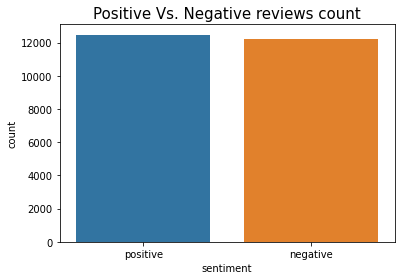

In [ ]:
 ####################################################### 
 # plot Positive Vs. Negative reviews count            # 
 #######################################################

sns.countplot(dataset['sentiment'])

plt.title("Positive Vs. Negative reviews count", fontsize = 15)
plt.show()

### Cleaning the Reviews (2 Points)

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
import pandas as pd
import re
import nltk
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
words = set(nltk.corpus.words.words())

# From the first assignment
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.\S+", "", text)
    text_links_removed = "".join([char for char in text if char not in string.punctuation])
    text_cleaned = " ".join([word for word in re.split('\W+', text_links_removed)
        if word not in stopword])
    text = " ".join([wn.lemmatize(word) for word in re.split('\W+', text_cleaned)])
    return text

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
 #############################################################################################  
 # Clean all the reviews in the dataset using the clean_text function provided above         # 
 ############################################################################################# 

dataset['review'] = dataset['review'].apply(lambda x: clean_text(x) )

In [ ]:
 #####################################################################
 # print head of the "CLEANED" data frame with help of head function # 
 #####################################################################
 
dataset.head()

,review,sentiment
0,one reviewer mentioned watching 1 oz episode y...,positive
1,wonderful little production br br filming tech...,positive
2,thought wonderful way spend time hot summer we...,positive
3,petter matteis love time money visually stunni...,positive
4,probably alltime favorite movie story selfless...,positive


### Splitting the dataset and Encoding Labels (2 Points)

Spliting data: <br> 
80% for the training and the remaining 20% for validation.

Encoding Labels: <br>
Encode labels as negative and positive as 0 and 1 respectively


In [ ]:
#################################################################################
# Split the data using the sklearn module                                       #
# 80% for the training and the remaining 20% for validation                     #
#################################################################################


train_sentences, test_sentences, train_labels, test_labels = train_test_split(dataset.review, dataset.sentiment,
                                                                              train_size = 0.8)

In [ ]:
#################################################################################
# Initialize label encoder from sklearn module                                  #
# fit on train labels and transform both train and validation labels            #
#################################################################################

le = LabelEncoder()
train_labels = le.fit_transform(train_labels.tolist())
test_labels = le.transform(test_labels.tolist())

### Pre-Processing The Text (5 Points)
 

In [ ]:
# You can use the modules given below
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

###############################################################################  
# Fit your tokenizer on the training reviews                                  #
###############################################################################
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_sentences)


#################################################################################################
# The word_index dictionary assigns a unique index to each unique word present in the training  #
# reviews.                                                                                      #
#                                                                                               #
# Create the word_index dictionary using the tokenizer                                          #
# Find the vocabulary of your training reviews                                                  #
#################################################################################################

word_index = tokenizer.word_index

vocabulary = len(word_index) + 1


#################################################################################################
# Convert the reviews in the dataset to their index form by using a function available          #
# with the tokenizer                                                                            #
# HINT : convert training and validation reviews into sequences                                 #
#################################################################################################

train_sequences = tokenizer.texts_to_sequences(train_sentences)
test_sequences = tokenizer.texts_to_sequences(test_sentences)
#################################################################################################
# Pad the the training and validation sequences so all of them have the same length             # 
# set maxlen = 200                                                                              #
#################################################################################################

# maxlen which is the maximum length of one review we will use for our training

train_padded = pad_sequences(train_sequences, padding = 'post', maxlen = 200)
test_padded = pad_sequences(test_sequences, padding = 'post', maxlen = 200)

print('Vocabulary : {}'.format(vocabulary))

Vocabulary : 100036


### Using glove vectors for embedding (5 Points)

GloVe vectors capture both global statistics and local statistics of a corpus. We use GloVe to convert words to embeddings in the vector space based on their semantics. 

We will be using the 200-dimensional GloVe vectors for the task at hand.

To learn more about GloVe please read the following resource:
- https://nlp.stanford.edu/pubs/glove.pdf

In [ ]:
glove_dictionary = {}
with open('glove.6B.200d.txt') as file:
    for each_line in file:
        words_in_line, coeff_cients = each_line.split(maxsplit=1)
        coeff_cients = np.array(coeff_cients.split(), dtype = float)
        glove_dictionary[words_in_line] = coeff_cients

In [ ]:
len(glove_dictionary)

400000

In [ ]:
 # All the words which are not in the GloVe dictionary will be assigned a zero vector.

embedding_matrix = np.zeros((vocabulary, 200))

######################################################################
# The glove_dictionary contains words vs their respective embeddings #
#                                                                    #
# Create the embedding matrix using the glove_dictionary             #
######################################################################

for word, i in word_index.items():
    embedding_vector = glove_dictionary.get(word)

    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
embedding_matrix.shape

(100036, 200)

Sample output : (99987, 200)

### Creating The Model (10)

If you need a refresher or have never worked with Neural Networks before, here are a few resources:
- https://web.stanford.edu/~jurafsky/slp3/7.pdf
- https://web.stanford.edu/~jurafsky/slp3/9.pdf
- https://colah.github.io/posts/2015-08-Understanding-LSTMs/


Training a neural network model will take time. 
- You can use Google Colab / Kaggle notebooks. You get a free GPU for a limited time.
- Without a GPU, You might have to wait longer to experiment.


Useful resources : <br>
https://www.tensorflow.org/api_docs/python/tf/keras/Sequential <br>
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense <br>
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout <br>





In [ ]:
import tensorflow as tf

tf.random.set_seed(42)

######################################################
# Complete this linear model in tensorflow           #
######################################################

def build_model(embedding_matrix):

  ''' 
  Arguments:
    embedding_matrix : a matrix with the corresponding embeddings
    of all words.

  Returns:
    The LSTM model that you created.
  '''
  
  model = tf.keras.Sequential()

  # TO DO: layer 1 : add embedding layer
  # The embedding layer maps the words to their embedding vectors from the embedding matrix
  model.add(tf.keras.layers.Embedding(vocabulary, 200, weights = [embedding_matrix], input_length = 200, trainable = False))


  # TO DO: layer 2 : add Bidirectional LSTM Layer
  model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128))) 


  # TO DO Add more layers : you can add more dense layers and dropout
  # NOTE : You should be able to achieve an validation accuracy greater than 85%
  #        within 10 epochs
  model.add(tf.keras.layers.Dense(units=64, activation='relu'))
  model.add(tf.keras.layers.Dropout(rate=0.5))

  model.add(tf.keras.layers.Dense(units=32, activation='relu'))
  model.add(tf.keras.layers.Dropout(rate=0.5))

  # TO DO Final layer : add output layer and activation
  model.add(tf.keras.layers.Dense(1, activation = 'sigmoid')) 


  # TO DO : use a loss function, optimizer as adam to compile 
  # and evaluate model on auc,precision,recall,accuracy
  # HINT : choose your loss function based on the task (binary classification)
  model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=[tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), 'accuracy'])
  
  return model

In [ ]:
# NOTE : You should be able to achieve an validation accuracy greater than 85%
#        within 10 epochs

#################################################################
# Call the build_model function and initialize the model        #
#################################################################
model = build_model(embedding_matrix)
#######################################################################################################
# train and validate the model on the padded sequences of text which we have created initially        #
#######################################################################################################
history = model.fit(train_padded, train_labels, epochs = 10, validation_data = (test_padded, test_labels))

Epoch 1/10
618/618 [==============================] - 21s 19ms/step - loss: 0.5538 - auc: 0.7962 - precision: 0.7301 - recall: 0.7206 - accuracy: 0.7236 - val_loss: 0.4331 - val_auc: 0.8944 - val_precision: 0.7489 - val_recall: 0.9015 - val_accuracy: 0.7998
Epoch 2/10
618/618 [==============================] - 11s 18ms/step - loss: 0.4096 - auc: 0.8986 - precision: 0.8268 - recall: 0.8361 - accuracy: 0.8283 - val_loss: 0.3396 - val_auc: 0.9298 - val_precision: 0.8336 - val_recall: 0.8788 - val_accuracy: 0.8518
Epoch 3/10
618/618 [==============================] - 11s 17ms/step - loss: 0.3435 - auc: 0.9296 - precision: 0.8595 - recall: 0.8661 - accuracy: 0.8605 - val_loss: 0.3282 - val_auc: 0.9359 - val_precision: 0.8775 - val_recall: 0.8241 - val_accuracy: 0.8547
Epoch 4/10
618/618 [==============================] - 11s 17ms/step - loss: 0.3106 - auc: 0.9423 - precision: 0.8732 - recall: 0.8853 - accuracy: 0.8768 - val_loss: 0.3126 - val_auc: 0.9417 - val_precision: 0.8748 - val_recall

### Plotting Accuracy and Losses (5 Points)
 




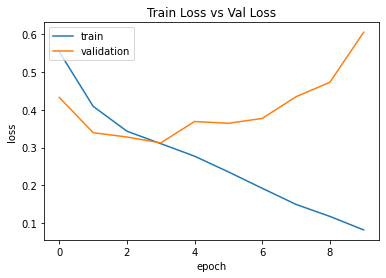

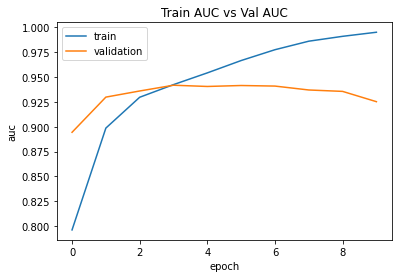

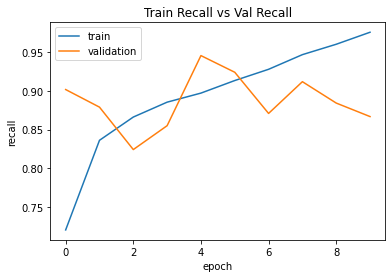

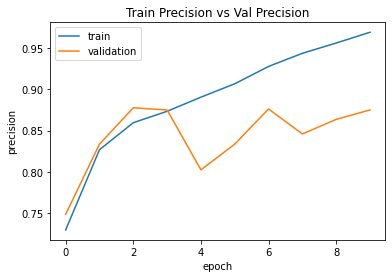

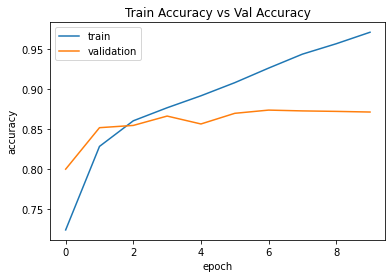

In [ ]:
####################################
# PLOT :                           #
# train loss vs val loss           #
# train auc vs val auc             #
# train recall vs val recall       #
# train precision vs val precision #
# train accuracy vs val accuracy   #
####################################

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train Loss vs Val Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('Train AUC vs Val AUC')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('Train Recall vs Val Recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('Train Precision vs Val Precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Train Accuracy vs Val Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# You will need to include the pickled model along with the other submission files
# The saved model will be used to verify your lstm's predictions on hidden reviews

##################################################################################
# Save your trained model as a pickle file named "lstm_classifier"               #
# You will be using this saved model to make predictions in the next module      #
##################################################################################

import pickle 
pickle.dump(model, open('/content/drive/MyDrive/lstm_classifier.pkl', 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......bidirectional
.........backward_layer
............cell
...............vars
..................0
..................1
..................2
............vars
.........forward_layer
............cell
...............vars
..................0
..................1
..................2
............vars
.........layer
............cell
...............vars
............vars
.........vars
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dropout
.........vars
......dropout_1
.........vars
......embedding
.........vars
............0
...metrics
......auc
.........vars
............0
............1
............2
............3
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
......precision
.........vars
............0
............1
......re

### Prediction (5 Points)

In [ ]:
######################################################################
# Load your saved model                                              #
# Use the saved model to make predictions                            #
######################################################################

saved_model = pickle.load(open('/content/drive/MyDrive/lstm_classifier.pkl', 'rb'))

Keras model archive loading:
File Name                                             Modified             Size
metadata.json                                  2023-03-12 22:13:26           64
config.json                                    2023-03-12 22:13:26         4142
variables.h5                                   2023-03-12 22:13:26     84355664
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......bidirectional
.........backward_layer
............cell
...............vars
..................0
..................1
..................2
............vars
.........forward_layer
............cell
...............vars
..................0
..................1
..................2
............vars
.........layer
............cell
...............vars
............vars
.........vars
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dropout
.........vars
...

In [ ]:
# use the saved model to predict the reviews
def predict_review(review):
  '''
  Arguments:
    review : A single review for which you want to predict the sentiment for.
             example: "This movie was amazing! I would defenitely watch it again."

  Returns:
    The predicted sentiment for the review : either 1 or 0
  '''
  
  review = clean_text(review)
    
  review = tokenizer.texts_to_sequences([review])

  review= pad_sequences(review, maxlen=200, padding="post")
    
  pred = saved_model.predict([review])
 ############################################################################# 
 # Predict the sentiment for the given review using the model                #
 # that you trained and return the sentiment                                 #
 #                                                                           #
 # HINT : Remember that the review needs to be "preprocessed" before you use #
 # it for prediction                                                         #
 #############################################################################

  return 0 if pred <= 0.5 else 1



In [ ]:
# Do not edit this cell

for review in ["If you like original gut wrenching laughter you will like this movie. If you are young or old then you will love this movie, hell even my mom liked it.<br /><br />Great Camp!!!",
                "What a waste of talent. A very poor, semi-coherent, script cripples this film. Rather unimaginative direction, too. Some VERY faint echoes of Fargo here, but it just doesn't come off.",
                "I have seen this film at least 100 times and I am still excited by it, the acting is perfect and the romance between Joe and Jean keeps me on the edge of my seat, plus I still think Bryan Brown is the tops. Brilliant Film.",
                "Cheap, amateurish, unimaginative, exploitative... but don't think it'll have redeeming amusement value. About as unentertaining, uninstructive and just plain dull as a film can be."]:
    p = predict_review(review)
    print(f'{review[:100]} -> {p}')
    

1/1 [==============================] - 1s 855ms/step
If you like original gut wrenching laughter you will like this movie. If you are young or old then y -> 1
1/1 [==============================] - 0s 23ms/step
What a waste of talent. A very poor, semi-coherent, script cripples this film. Rather unimaginative  -> 0
1/1 [==============================] - 0s 23ms/step
I have seen this film at least 100 times and I am still excited by it, the acting is perfect and the -> 1
1/1 [==============================] - 0s 22ms/step
Cheap, amateurish, unimaginative, exploitative... but don't think it'll have redeeming amusement val -> 0


### Expected Output:

If you like original gut wrenching laughter you will like this movie. If you are young or old then y -> 1 <br>
What a waste of talent. A very poor, semi-coherent, script cripples this film. Rather unimaginative  -> 0 <br>
I have seen this film at least 100 times and I am still excited by it, the acting is perfect and the -> 1 <br>
Cheap, amateurish, unimaginative, exploitative... but don't think it'll have redeeming amusement val -> 0